<h1><b>Exploratory Data Analysis -  Retail</b></h1>

**Importing all the necessary libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the file**

In [4]:
df=pd.read_csv("/content/SampleSuperstore.csv")
copy_df=df
copy_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Checking for NULL values**

In [6]:
copy_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
copy_df.columns 

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
copy_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
copy_df.duplicated().sum()

17

**Checking for the unique values**

In [10]:
copy_df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Dropping the duplicate values and postal code for more accuracy**

In [11]:
copy_df.drop_duplicates(inplace=True)

In [33]:
postal=copy_df.drop(['Postal Code'],axis=1,inplace=True)

**By analysing the pair plot we can see maximum numbers of sales are done in standard mode**

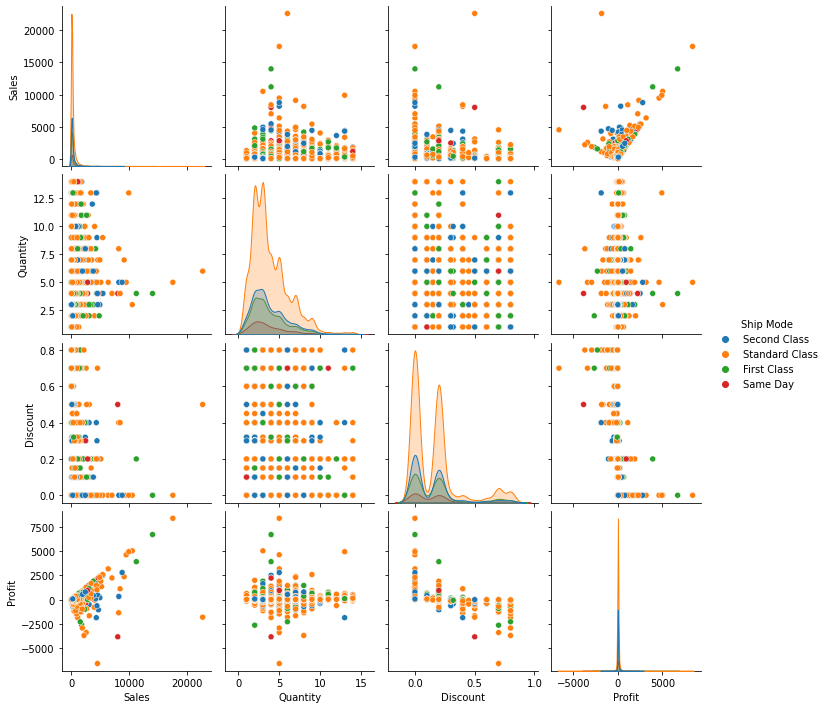

In [34]:
sns.pairplot(copy_df,hue='Ship Mode')

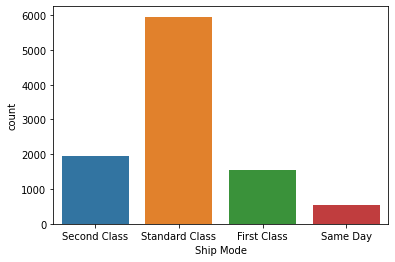

In [36]:
sns.countplot(x=copy_df['Ship Mode'])

In [45]:
copy_df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

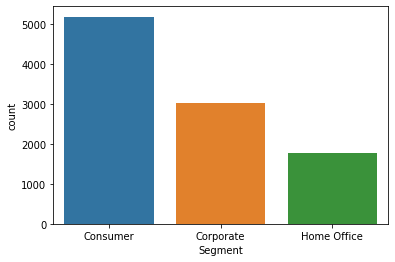

In [37]:
sns.countplot(x=copy_df['Segment'])

In [46]:
copy_df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

**By analysing this count plot we can see maximum number of office Supplies are sold out**

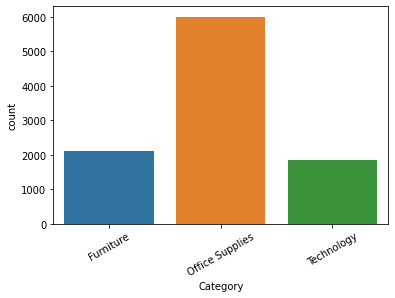

In [63]:
plt.xticks(rotation=30)
sns.countplot(x=copy_df['Category'])

In [47]:
copy_df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

**By analysing this we can say maximum numbers of Binders are sole out**

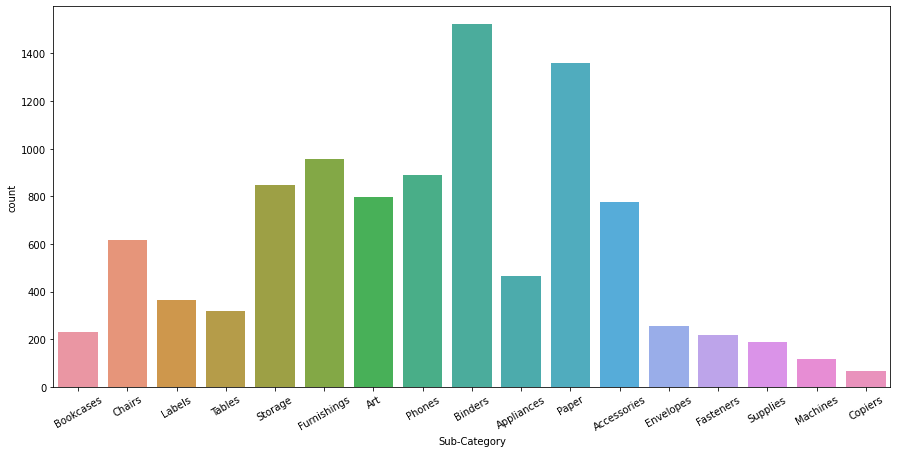

In [100]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=30)
sns.countplot(x=copy_df['Sub-Category'])

In [48]:
copy_df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

**Finding out the corelation between the numaric variables**

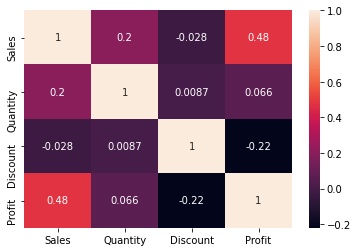

In [40]:
sns.heatmap(copy_df.corr(),annot=True)

In [41]:
neumaric_features=copy_df.select_dtypes(include=[np.number])
neumaric_features.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [42]:
corelation=neumaric_features.corr()
print(corelation['Sales'].sort_values(ascending=False),'\n')

Sales       1.000000
Profit      0.479067
Quantity    0.200722
Discount   -0.028311
Name: Sales, dtype: float64 



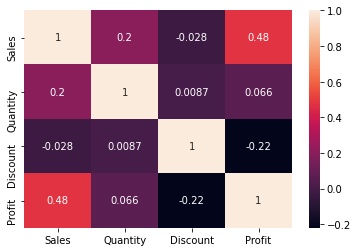

In [43]:
sns.heatmap(corelation,annot=True)

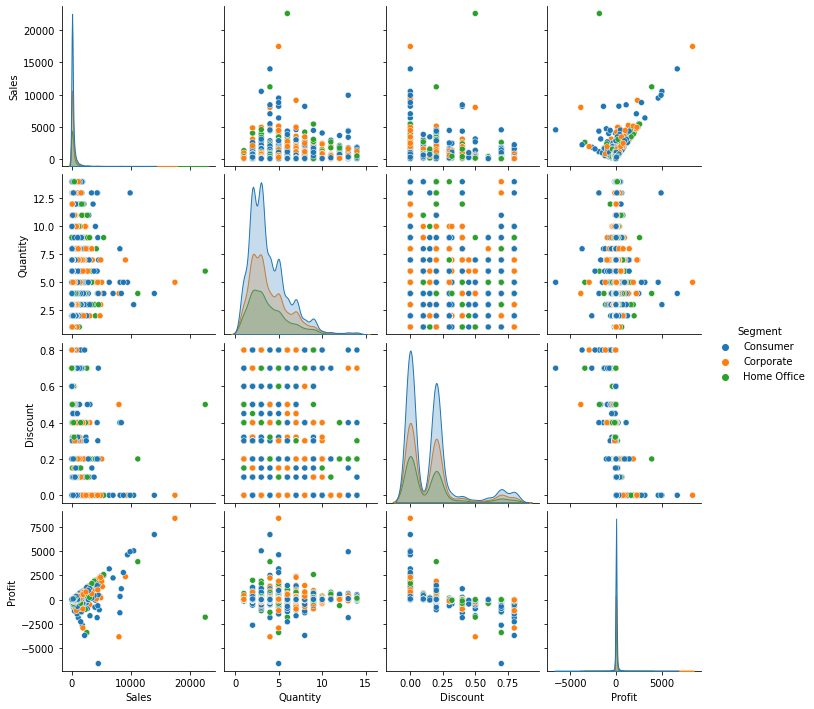

In [44]:
sns.pairplot(copy_df,hue='Segment')

**By analysing the pie plot we can say Paper has the highest share**

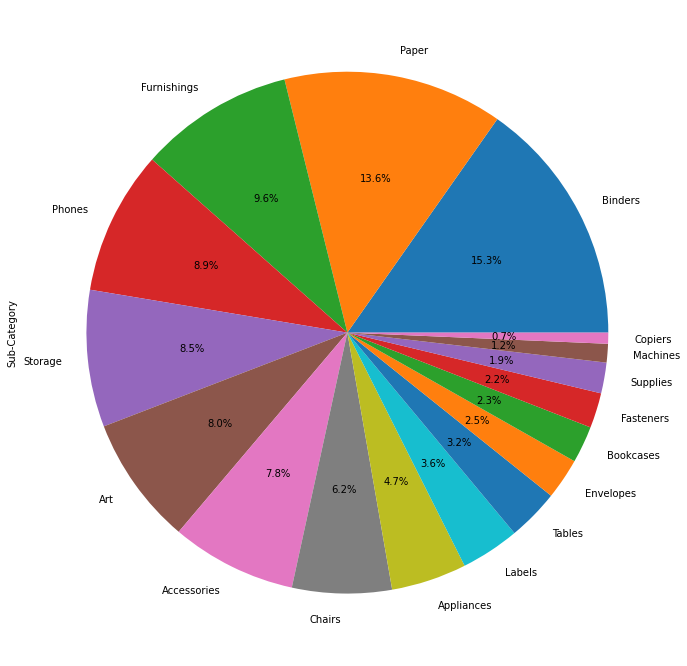

In [69]:
plt.figure(figsize=(15,12))
df['Sub-Category'].value_counts().plot.pie(subplots=True,autopct = '%1.1f%%')
plt.show()

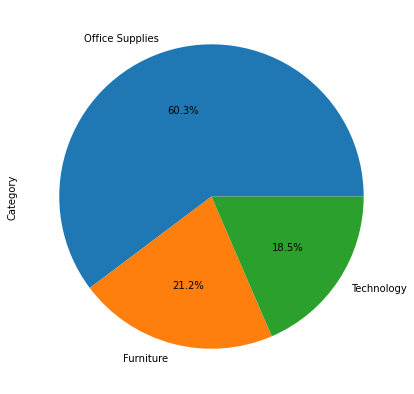

In [70]:
plt.figure(figsize=(10,7))
df['Category'].value_counts().plot.pie(subplots=True,autopct = '%1.1f%%')
plt.show()

In [54]:
copy_df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

**By analysing this count plot we can see maximum sales are done in California**

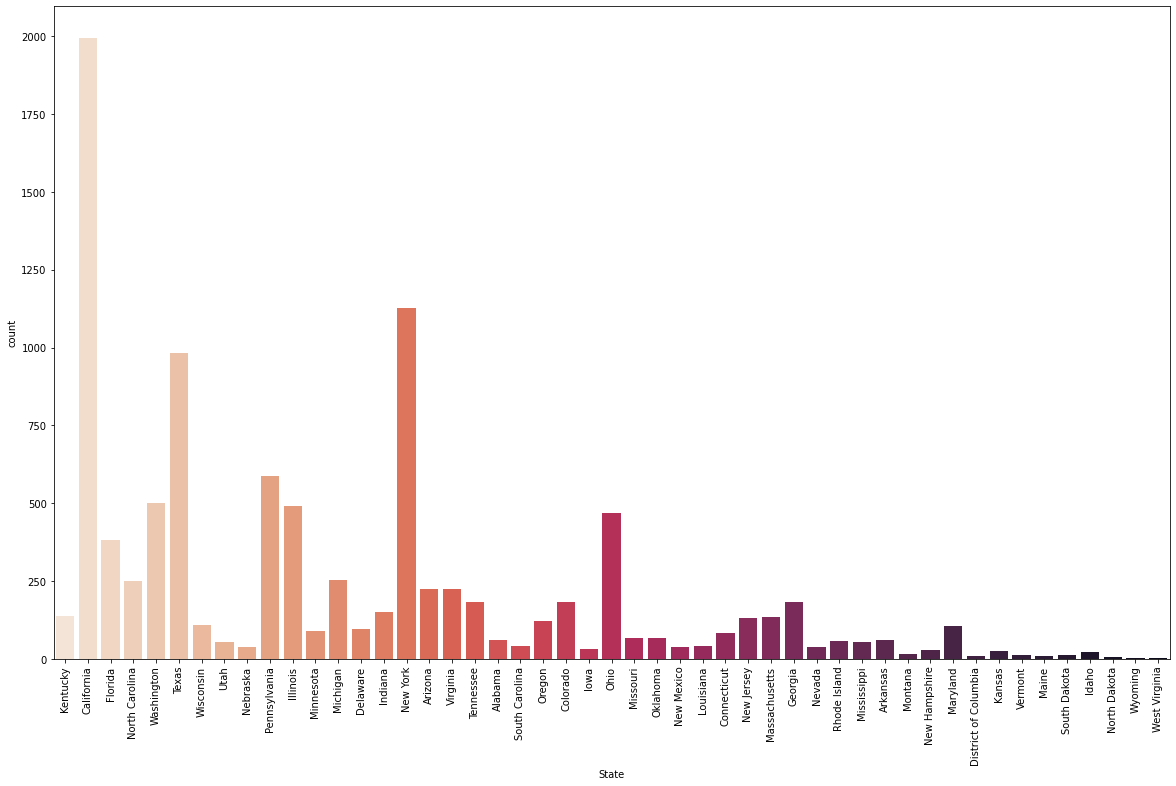

In [67]:
plt.figure(figsize=(20,12),)
plt.xticks(rotation=90)
sns.countplot(x=copy_df['State'],palette='rocket_r')


**By analysing this histogram we can see that people prefer to buy 2 or 3 products at a time**

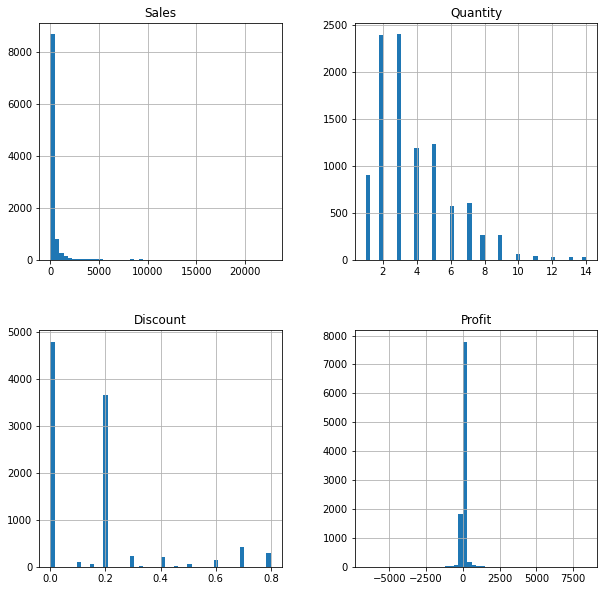

In [68]:
copy_df.hist(figsize=(10,10),bins=50)
plt.show()

**Maximum sales are done in West region**

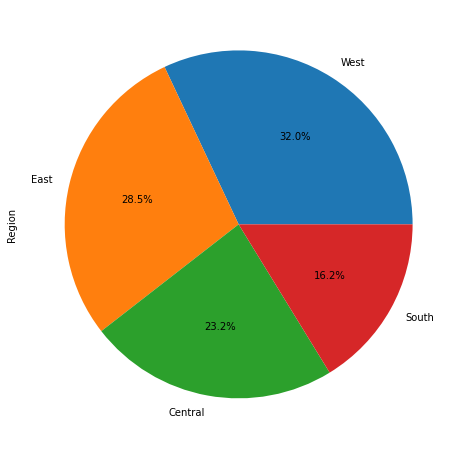

In [73]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

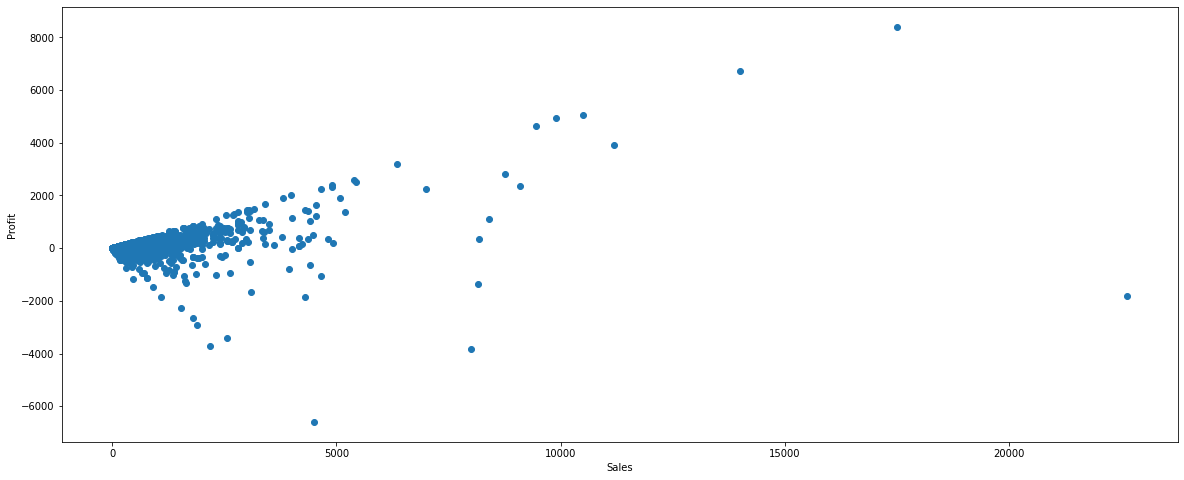

In [75]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(df['Sales'],df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

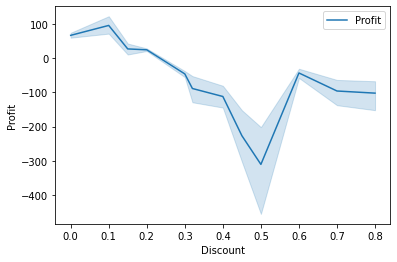

In [77]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=copy_df)
plt.legend()
plt.show()

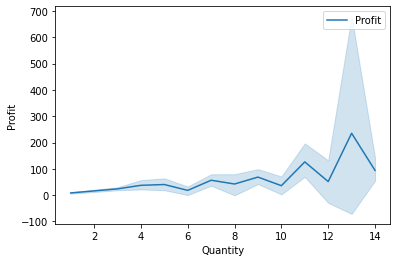

In [78]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=copy_df)
plt.legend()
plt.show()

**Segment wise Profit and Sales.We can see that we are generating more revenue in consumer segment**

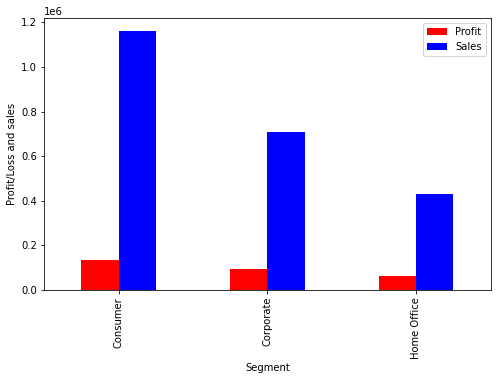

In [79]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['red','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

**Segment wise sales in each region**

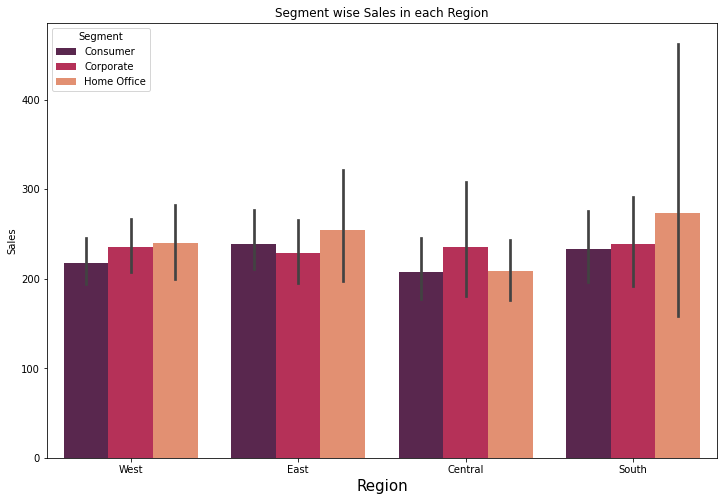

In [81]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=copy_df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

**Region wise Profit and Sales**

Text(0, 0.5, 'Profit and sales')

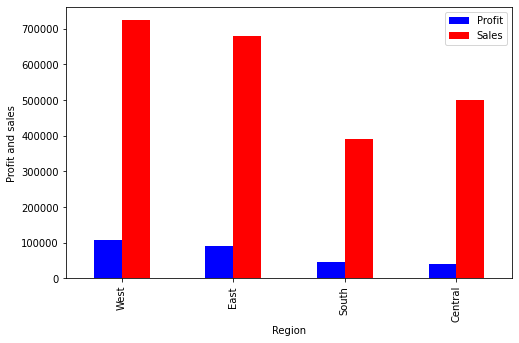

In [96]:
copy_df.groupby('Region')[['Profit','Sales']].sum().sort_values(by='Profit',ascending=False).plot.bar(color=['blue','red'],figsize=(8,5))
plt.ylabel("Profit and sales")

**State wise Sales and Profit**

Text(0, 0.5, 'Profit/loss & Sales')

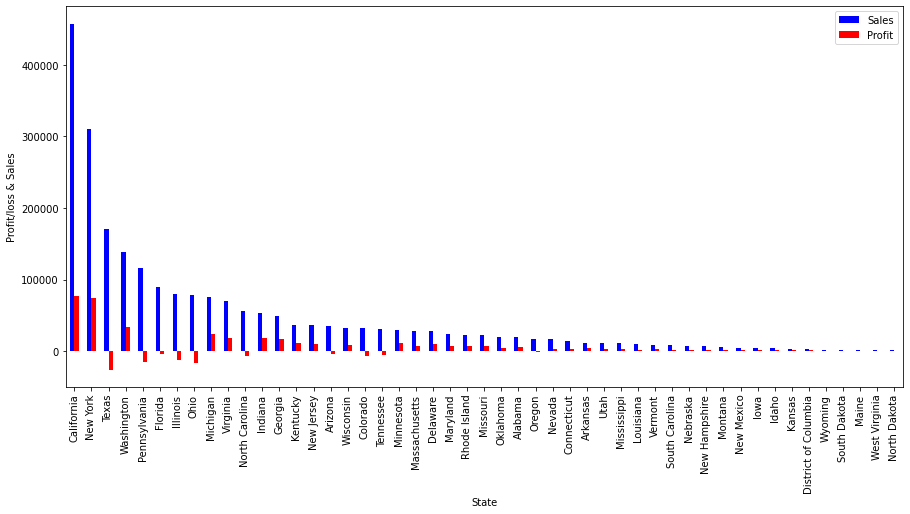

In [87]:
df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).plot.bar(color=['blue','red'],figsize=(15,7))
plt.ylabel("Profit/loss & Sales")

**Categorywise sales and profit**

Text(0, 0.5, 'Profit/loss & Sales')

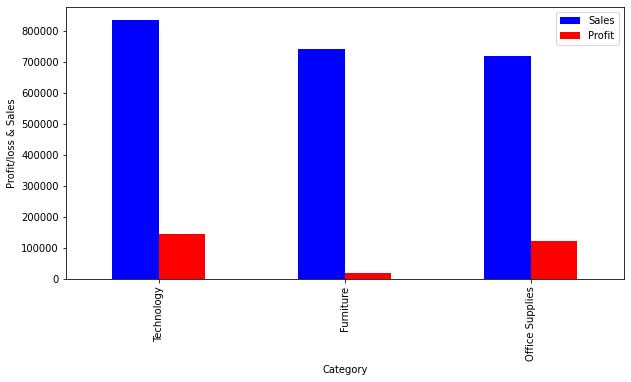

In [95]:
df.groupby('Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).plot.bar(color=['blue','red'],figsize=(10,5))
plt.ylabel("Profit/loss & Sales")

**Sub category wise sales and profit**

Text(0, 0.5, 'Profit/loss & Sales')

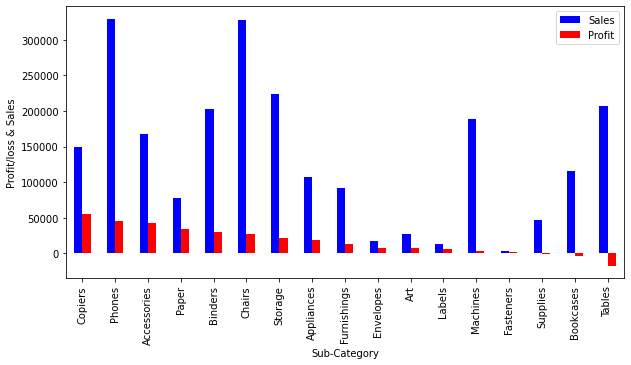

In [94]:
df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False).plot.bar(color=['blue','red'],figsize=(10,5))
plt.ylabel("Profit/loss & Sales")

Text(0, 0.5, 'Profit/loss & Sales')

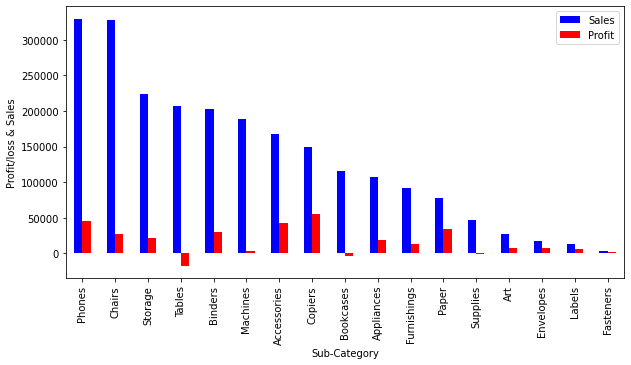

In [98]:
df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).plot.bar(color=['blue','red'],figsize=(10,5))
plt.ylabel("Profit/loss & Sales")


1.   Phone subcategory has Higer sales
2.   Chair has high sales but less profit compare to Phone
3.   Tables and bookcases are facing huge loss
4.   Fasteners are not sold out that much